## Analyzing Medal Distribution in Olympic Wrestling

- Author: Izaan Khudadad
- Email : ikhudada@charlotte.edu
- Affiliation: University of North Carolina at Charlotte

Categories:

- Exploratory Data Analysis (EDA)
- Grouping and Aggregation
- Data Visualization 
- Quantifying Inequality

## Introduction
In this activity, you will explore a dataset of Olympic freestyle wrestling results compiled from historical competitions between 1896 and 2020. The dataset includes details on the athlete (such as name, country, and birth year), event (year, weight class, and style), and results (medal earned).

Each observation represents a single medal-winning performance by an athlete in a specific Olympic event. This structure allows you to investigate patterns in medal distribution between countries, identify long-term dominance, and quantify inequality in performance at the Olympic level.

By the end of the activity, you should be able to:

1. Measure inequality in medal distribution using statistical methods like the Gini coefficient.
2. Visualize inequality with tools such as Lorenz curves and medal-share heatmaps.
3. Apply Python libraries such as pandas, matplotlib, and numpy to perform grouping, aggregation, and visualization.


### Data
The dataset contains all Olympic freestyle wrestling medalists from 1896 to 2020. It includes athlete information, event details, and medal results. This dataset provides a unique opportunity to study competitive balance, long-term performance trends, and the concentration of success among nations.

[Olympic Freestyle Data](https://github.com/schuckers/Charlotte_SCORE_Summer25/blob/main/Data%20for%20Modules/Data%20for%20Medal%20Distribution%20in%20Olympic%20Wrestling%20by%20Izaan%20Khudadad/olympic-freestylewrestling-results-1894-2020-v1.csv)

<details>
<summary><b>Variable Descriptions</b></summary>

| Variable | Description |
|--------------------|-----------------------------------------------------------------------------|
| olymping-wrestling-results-           |  identifier or file name reference |
| event_title| Name of the wrestling event  |
| slug_game         | Short code or identifier for the Olympic Games edition      |
| participant_type  |Whether the participant is an athlete or a team |
| medal_type    |Type of medal won – Gold, Silver, Bronze (may be blank if no medal awarded)|
| athletes  | Count of athletes |
| rank_equal  | Indicates if multiple participants share the same rank|
| rank_position  |The position or rank achieved in the event|
| country_name     | Full name of the country the participant represents|
| country_3_letter_code  | Three-letter country code |
| athlete_url  | Web link to the athlete’s profile page|
| athlete_full_name  |Full name of the athlete |
| value_unit |Unit for value measurement |
| value_type | Type of value recorded |
| country_code| Numeric or alphanumeric country identifier |


**Data Source**

[Kaggle](https://www.kaggle.com/datasets/kasimdata/olympic-wrestling-results)

**Solutions**

[Solutions](https://github.com/schuckers/Charlotte_SCORE_Summer25/blob/main/Modules/Analyzing%20Medal%20Distribution%20in%20Olympic%20Wrestling%20by%20Izaan%20Khudadad/SolutionsInequalityMedal.ipynb)

## Learning Goals
In this module, students will explore how to measure and visualize inequality in Olympic freestyle wrestling medal distribution. By applying statistical measures and data visualization techniques, students will develop core data science skills such as:
- Understanding and calculating the Gini coefficient to quantify inequality
- Creating and interpreting Lorenz curves to visualize distribution patterns
- Using grouping and aggregation to prepare data for analysis
- Building and reading heatmaps to track country performance over time

## Material

### Understanding Inequality in Sports Medals
When we talk about inequality in sports results, we’re asking:
   Are medals shared fairly among all countries, or do a few countries win most of them?

Quantifying Inequality
- To quantify something means to turn it into a number we can measure and compare.
- For inequality, one common measure is the Gini Impurity Index.

The formula for the Gini Impurity Index:

$$ G = 1- \sum_{i=1}^n p_i.$$

where $p_i$ is the proportion of observations in class $i$.

Gini Impurity
- The Gini Impurity is a number between 0 and 1:
   - 0 → Perfect equality (all countries have the same number of medals)
   - 1 → Maximum inequality (one country wins all the medals, everyone else gets none)
- The higher the Gini value, the more unequal the distribution

**Example**

Case 1: 80–20 split

Country A: 80% of medals → 
- Country A: 80% of medals → $$P_A = 0.8$$.
- Country B: 20% of medals → $$P_B = 0.2$$.

$$G = 1- (0.8)^2 - (0.2)^2 = 0.32.$$

Case 2: 50–50 split 
- Country A: 50% of medals → $$P_A = 0.5$$.
- COuntry B: 50% of medals → $$P_B = 0.5$$.

$$G=1−(0.5^2+0.5^2)=1−(0.25+0.25)=`0.50$$`

**Interpreting This**

- Higher values of G indicate a more even split among the groups.  
- A Gini closer to 1 means high inequality (one or few countries dominate).

So yes — 0.32 actually shows more equality than 0.50.
It’s not “as simple as 50%” — the Gini is sensitive to how evenly the distribution is spread out.

- 0.32 → medals are somewhat skewed but still shared more equally.
- 0.50 → medals are more concentrated, less equal

the lower the Gini, the more equal the medal distribution

In [1]:
# Import needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/schuckers/Charlotte_SCORE_Summer25/refs/heads/main/Data%20for%20Modules/Data%20for%20Medal%20Distribution%20in%20Olympic%20Wrestling%20by%20Izaan%20Khudadad/olympic-freestylewrestling-results-1894-2020-v1.csv")

# See the first 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   olymping-wrestling-results-  3565 non-null   object 
 1   event_title                  3833 non-null   object 
 2   slug_game                    3833 non-null   object 
 3   participant_type             3833 non-null   object 
 4   medal_type                   731 non-null    object 
 5   athletes                     0 non-null      float64
 6   rank_equal                   677 non-null    object 
 7   rank_position                2648 non-null   object 
 8   country_name                 3833 non-null   object 
 9   country_code                 3732 non-null   object 
 10  country_3_letter_code        3833 non-null   object 
 11  athlete_url                  3344 non-null   object 
 12  athlete_full_name            3833 non-null   object 
 13  value_unit        

`df['medal_type'].notna()`
Creates a boolean mask where rows have a value in medal_type (i.e., the athlete won a medal). Rows with NaN in medal_type are excluded

In [2]:
medals = df[df['medal_type'].notna()].copy()

# --- extract year from slug_game (e.g., 'tokyo-2020' -> 2020) ---
medals['year'] = (
    medals['slug_game']
    .str.extract(r'(\d{4})')  # find a 4-digit number (year) in the string
    .astype(float)            # convert from string to float (temporary step)
    .astype('Int64')          # convert to integer, allowing for missing values
)

# 1) Medal counts by country (for inequality)
counts = medals['country_name'].value_counts()

`.str.extract(r'(\d{4})')`
Uses a regular expression to pull out any 4-digit number from `slug_game` (e.g., `"tokyo-2020"` → `2020`).

`.astype(float)` → `.astype('Int64')`
We first convert to float to handle NaN values, then to Pandas' nullable integer type `Int64`.

We now have a new column `year` that holds the numeric year for each medal event.

Lets check for the countries with the most medals. 

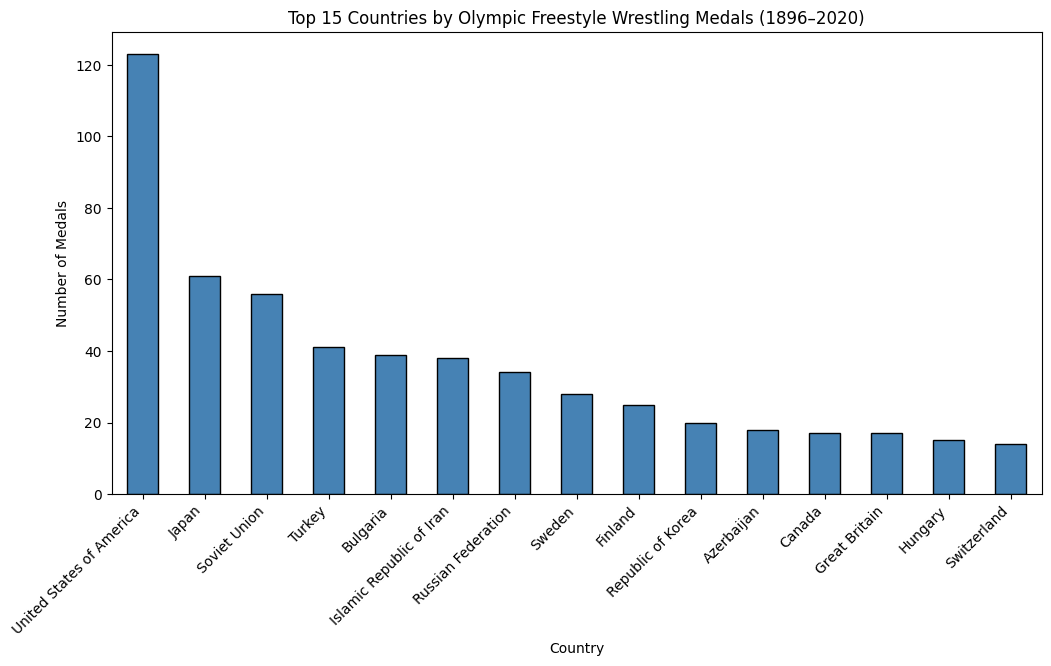

In [3]:
plt.figure(figsize=(12, 6))  # make the chart wide so labels fit
counts.head(15).plot(kind='bar', color='steelblue', edgecolor='black')

# Step 5: Add labels and a title for clarity 
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.title("Top 15 Countries by Olympic Freestyle Wrestling Medals (1896–2020)")
plt.xticks(rotation=45, ha="right")  # rotate x-axis labels so they don’t overlap

# Show the chart 
plt.show()

The Gini coefficient is a number between 0 and 1 that tells us how unequal something is distributed:
- 0 means perfect equality — every country has the exact same number of medals.
- 1 means perfect inequality — one country has all the medals, and no one else has any.

In [4]:
def gini(x):
    # Convert to a sorted NumPy array of floats
    x = np.sort(np.array(x, dtype=float))
    
    # If total medals = 0, inequality is undefined
    if x.sum() == 0: 
        return np.nan
    
    # Cumulative sum
    cum = np.cumsum(x)
    n = len(x)
    
    # Correct Gini calculation (normalizing result between 0 and 1)
    return (n + 1 - 2 * (cum / cum[-1]).sum()) / n

# Apply function
gini_score = gini(counts.values)

# Show result both as proportion and percentage
print(f"Gini coefficient (proportion): {gini_score:.3f}")
print(f"Gini coefficient (percentage): {gini_score * 100:.1f}%")

Gini coefficient (proportion): 0.623
Gini coefficient (percentage): 62.3%


**Understanding the Gini Coefficient in This Context**

A Gini coefficient of 0.623 from the freestyle wrestling medal data means there is a high level of inequality in how medals are distributed across countries.
A Gini of 0.623 reflects that these few powerhouses win a disproportionately large share of medals, while many other countries win few or none.
- Most countries participate, but only a small group consistently stands on the podium.

You can think of it like this: if the medal distribution were perfectly fair, the Gini would be close to 0 — but here it’s more than halfway to 1, showing that success in freestyle wrestling is concentrated among a few top-performing countries

In [5]:
# Step 1: Sort medal counts from smallest to largest
#   This lets us calculate the cumulative share from least-winning to most-winning countries
sorted_medals = np.sort(counts.values)

# Step 2: Calculate the cumulative share of medals
#   - np.cumsum() adds up the medals as we go through the sorted list
#   - Divide by the total number of medals to get the proportion (0 to 1)
cum_share = np.cumsum(sorted_medals) / sorted_medals.sum()

# Step 3: Calculate the cumulative share of countries (the population share)
#   - Divide by total number of countries to get the proportion of countries (0 to 1)
pop_share = np.arange(1, len(sorted_medals) + 1) / len(sorted_medals)

**Lorenz Curve**
- A Lorenz Curve is a picture of how medals are spread across countries.
- We sort countries from the lowest to the highest medal count, then plot:
    - X-axis: The % of countries.
    - Y-axis: The % of total medals they have.
- If medals were perfectly equal, the curve would be a straight diagonal line.
- The more the curve bows downwards, the greater the inequality.

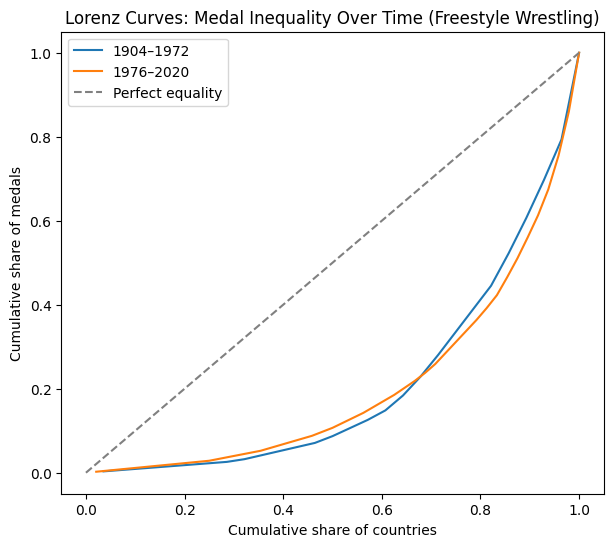

In [6]:
# --- Step 1: Split the dataset into two time periods ---
early = medals[(medals["year"] >= 1904) & (medals["year"] <= 1972)]
recent = medals[(medals["year"] >= 1976) & (medals["year"] <= 2020)]

# --- Step 2: Count medals by country in each time period ---
early_counts = early["country_name"].value_counts()
recent_counts = recent["country_name"].value_counts()

# --- Step 3: Define a helper function to calculate Lorenz curve data ---
def lorenz_curve(counts):
    # Sort medal counts from smallest to largest
    sorted_medals = np.sort(counts.values)
    # Cumulative share of medals
    cum_share = np.cumsum(sorted_medals) / sorted_medals.sum()
    # Cumulative share of countries
    pop_share = np.arange(1, len(sorted_medals)+1) / len(sorted_medals)
    return pop_share, cum_share

# --- Step 4: Calculate Lorenz curve values for both eras ---
pop_early, cum_early = lorenz_curve(early_counts)
pop_recent, cum_recent = lorenz_curve(recent_counts)

# --- Step 5: Plot both Lorenz curves on the same chart ---
plt.figure(figsize=(7,6))
plt.plot(pop_early, cum_early, label="1904–1972")
plt.plot(pop_recent, cum_recent, label="1976–2020")
plt.plot([0,1],[0,1],'--',color='gray',label="Perfect equality")

# Add labels and title
plt.xlabel("Cumulative share of countries")
plt.ylabel("Cumulative share of medals")
plt.title("Lorenz Curves: Medal Inequality Over Time (Freestyle Wrestling)")
plt.legend()
plt.show()

- The dashed diagonal line (“Perfect equality”) is the scenario where every country has won the same share of medals. For example, if each country had won 2 medals, the curve would be perfectly diagonal.
1. Shape of the Curves
- 1904–1972 (blue line): The curve bows downward more strongly, meaning a smaller group of countries won the majority of medals. Inequality in medal distribution was higher.
- 1976–2020 (orange line): The curve is a little closer to the 45° equality line, suggesting medals became slightly more spread out across countries in later years.
2. Interpretation in Wrestling Context
- In the early Olympic years, wrestling powerhouses (like the Soviet Union, USA, and Turkey) dominated most of the medal counts. Many countries barely won any medals at all.
- In the later period, more countries began participating and winning. The USSR broke apart into multiple independent nations, each winning medals. Also, nations like Iran, Japan, and South Korea became stronger. This broadened the medal distribution and reduced inequality slightly.

To better understand how the distribution of freestyle wrestling medals has changed over time, we can look beyond overall totals and explore trends year by year. A heatmap allows us to see not only which countries have been dominant but also when they were most successful. The vertical axis (years) shows Olympic cycles, while the horizontal axis (countries) lists participating nations. The shading intensity represents medal counts — darker colors mean more medals. This way, we can visually identify historical periods of dominance (such as the Soviet Union or the United States), emerging nations in later years, and whether medal distribution has become more concentrated or diversified across countries over time.

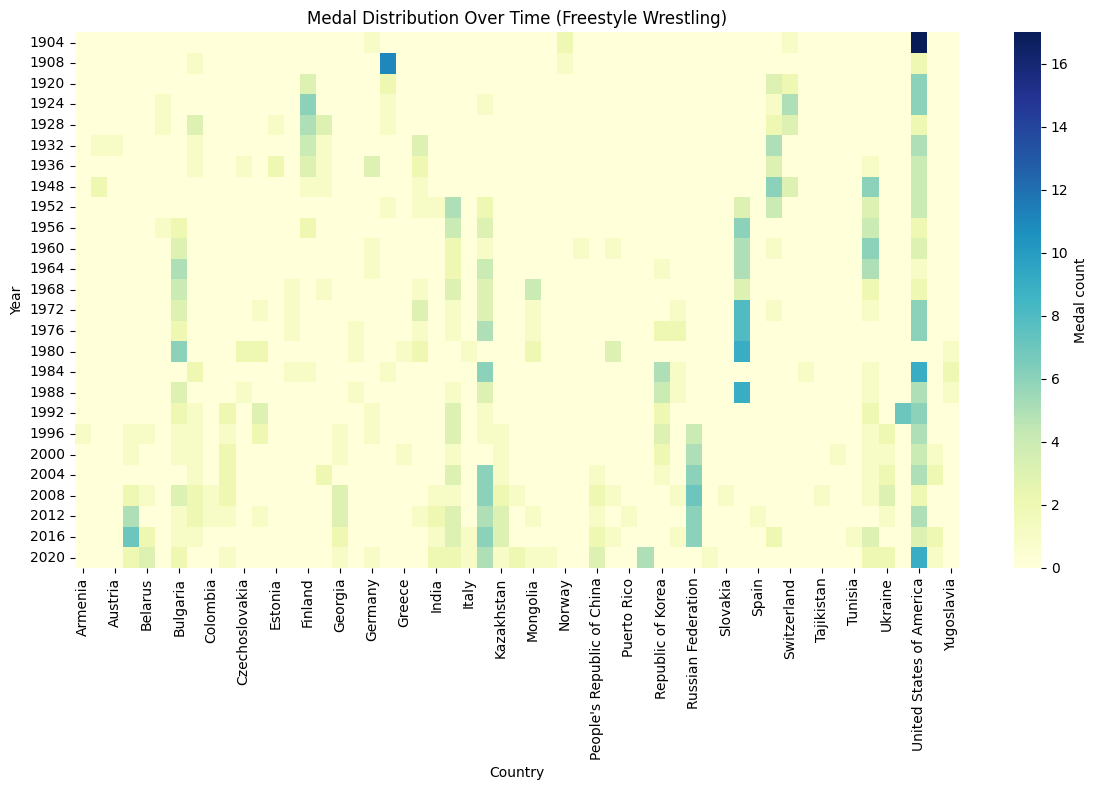

In [7]:
# 4) Heatmap of medals over time (years x countries)
pivot = (medals
         .dropna(subset=['year'])
         .pivot_table(index='year', columns='country_name',
                      values='medal_type', aggfunc='count', fill_value=0))

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Medal count'})
plt.title("Medal Distribution Over Time (Freestyle Wrestling)")
plt.xlabel("Country"); plt.ylabel("Year")
plt.tight_layout(); plt.show()

This code reshapes the medal dataset so each row is an Olympic year and each column is a country. The values in the table are how many medals that country won in that year. This format makes it easy to create a heatmap, where darker colors can represent higher medal counts. It’s a quick way to spot patterns like which countries dominated in certain years or how a country’s performance has changed over time.

## Activity 

1. Gold Medal Counts by Country
- Use the wrestling dataset to calculate how many gold medals each country has won.
- Make a bar chart showing which countries have the most gold medals.
- Calculate the Gini coefficient for gold medal distribution.
2. From the heatmap of medals over time, identify one country that has shown consistent dominance and one country that appears to have recently improved its performance.